# Housing Prices: Regression Model Training

## 1. Data Setup
## 2. Feature Selection
## 3. Train/Test Split
## 4. Decision Tree Regressor
## 5. Linear Regression
## 6. Model Comparison
## 7. Observations & Next Steps

# Housing Prices Regression - Initial Model

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [4]:
# Load the housing dataset
file_path = 'data/housing.csv'  # Adjust if your folder is different
home_data = pd.read_csv(file_path)

In [5]:
# Basic data review
print(home_data.describe())
print(home_data.head())

# Display all column names
print(home_data.columns)

              Rooms         Price      Distance      Postcode      Bedroom2  \
count  13580.000000  1.358000e+04  13580.000000  13580.000000  13580.000000   
mean       2.937997  1.075684e+06     10.137776   3105.301915      2.914728   
std        0.955748  6.393107e+05      5.868725     90.676964      0.965921   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.500000e+05      6.100000   3044.000000      2.000000   
50%        3.000000  9.030000e+05      9.200000   3084.000000      3.000000   
75%        3.000000  1.330000e+06     13.000000   3148.000000      3.000000   
max       10.000000  9.000000e+06     48.100000   3977.000000     20.000000   

           Bathroom           Car       Landsize  BuildingArea    YearBuilt  \
count  13580.000000  13518.000000   13580.000000   7130.000000  8205.000000   
mean       1.534242      1.610075     558.416127    151.967650  1964.684217   
std        0.691712      0.962634    3990.669241   

In [6]:
# Select target
y = home_data['Price']

# Select features
feature_names = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt', 'Car']
X = home_data[feature_names]

Selected features are numeric and likely to influence home price directly. Categorical features will be explored later.

In [7]:
# Split into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
print(train_X.shape, val_X.shape)

# Create and train the model
tree_model = DecisionTreeRegressor(random_state=1)
tree_model.fit(train_X, train_y)

(10185, 6) (3395, 6)


DecisionTreeRegressor(random_state=1)

In [8]:
# Predict on validation data and calculate MAE
tree_preds = tree_model.predict(val_X)
tree_mae = mean_absolute_error(val_y, tree_preds)
print(f"Decision Tree MAE: {tree_mae}")

Decision Tree MAE: 417117.66685911367


In [9]:
# Create a comparison table
comparison = pd.DataFrame({
    'Predicted': tree_preds,
    'Actual': val_y
})

# Show first few predictions
print(comparison.head())

       Predicted     Actual
321    1500000.0  1640000.0
4003    572000.0   675000.0
13348  3450000.0  2800000.0
2697    767000.0   615000.0
12600  2325000.0  2700000.0


In [10]:
tree_comparison = pd.DataFrame({
    'Predicted': tree_preds,
    'Actual': val_y
})
print(tree_comparison.head())

       Predicted     Actual
321    1500000.0  1640000.0
4003    572000.0   675000.0
13348  3450000.0  2800000.0
2697    767000.0   615000.0
12600  2325000.0  2700000.0


## Notes and Reflection

- **Model:** DecisionTreeRegressor
- **Features used:** Rooms, Bathroom, Landsize, BuildingArea, YearBuilt, Car
- **Validation MAE:** 417,118
- **Observations:**
  - The model generally predicts house prices within about $400k on average.
  - Some predictions are close (e.g., $2.3M predicted vs $2.7M actual), but others are more noticeably off.
  - There may be missing important factors like location (Suburb, Distance, etc.) that influence house price heavily.
- **Next steps:**
  - Try more features (e.g., Distance, Lattitude/Longtitude).
  - Try more powerful models like Random Forests.
  - Improve data cleaning (handle missing values, remove outliers).

In [11]:
# Drop rows with missing values
train_X = train_X.dropna()
train_y = train_y.loc[train_X.index]

val_X = val_X.dropna()
val_y = val_y.loc[val_X.index]

# Create and train a Linear Regression model
linreg_model = LinearRegression()
linreg_model.fit(train_X, train_y)

# Make predictions with Linear Regression
linreg_preds = linreg_model.predict(val_X)

# Evaluate the Linear Regression model
linreg_mae = mean_absolute_error(val_y, linreg_preds)
print(f"Linear Regression MAE: {linreg_mae}")

Linear Regression MAE: 319811.9951414179


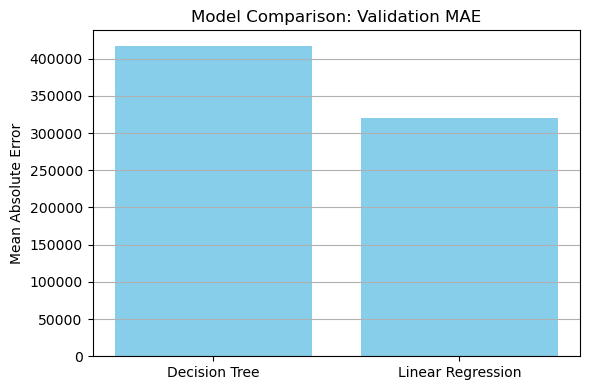

In [12]:
# %%
# # This is a code cell

import matplotlib.pyplot as plt

# Bar chart comparing model performance
mae_values = [tree_mae, linreg_mae]
models = ['Decision Tree', 'Linear Regression']

plt.figure(figsize=(6, 4))
plt.bar(models, mae_values, color='skyblue')
plt.ylabel('Mean Absolute Error')
plt.title('Model Comparison: Validation MAE')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Model Comparison

| Model             | MAE         |
|------------------|-------------|
| Decision Tree     | 417,118     |
| Linear Regression | 319,812     |

Linear Regression outperformed the Decision Tree on this feature set, likely due to its lower variance and linear data relationships.

## Notes on Linear Regression

- After dropping rows with missing feature values, trained a Linear Regression model.
- Validation MAE for Linear Regression: 319,812
- Compared to Decision Tree model (MAE: 417,118), Linear Regression performed better.
- Likely reasons:
  - Relationship between features and price may be fairly linear.
  - Decision Tree may have overfitted to noise in small datasets.
- Future ideas:
  - Add more features (e.g., Distance, Lattitude, Longtitude).
  - Try data imputation instead of dropping missing values to preserve data.

- The Decision Tree appears to overfit slightly with this small feature set.
- Linear Regression handled the numerical features better.
- Next: Try more features, categorical encoding, or switch to Random Forest for better generalization.

## 6. Model Refinement and Evaluation

### Baseline Recap

- Decision Tree MAE: ~417,000  
- Linear Regression MAE: ~320,000  
- Decision Tree showed signs of overfitting (high train accuracy, poor generalization)

## 6.1 Feature Set Comparison

Basic MAE: 444666
No Landsize MAE: 398598
With Car + YearBuilt MAE: 339981
All Available MAE: 372995


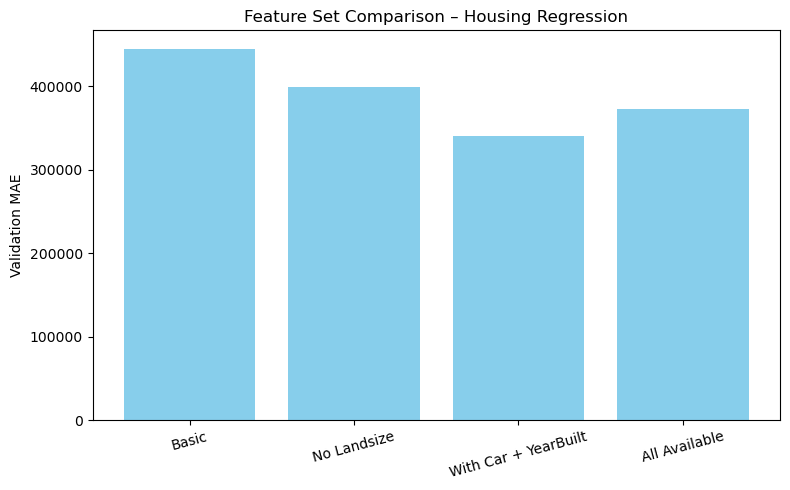

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Store MAEs to compare later
mae_results = {}

# Define multiple feature sets
feature_sets = {
    "Basic": ['Rooms', 'Bathroom', 'Landsize'],
    "No Landsize": ['Rooms', 'Bathroom', 'BuildingArea'],
    "With Car + YearBuilt": ['Rooms', 'Bathroom', 'Car', 'YearBuilt'],
    "All Available": ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt', 'Car']
}

for name, features in feature_sets.items():
    X = home_data[features]
    y = home_data['Price']

    # Drop rows with missing values
    X = X.dropna()
    y = y.loc[X.index]

    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

    model = DecisionTreeRegressor(random_state=1)
    model.fit(train_X, train_y)

    preds = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds)
    
    print(f"{name} MAE: {mae:.0f}")
    mae_results[name] = mae

    import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(mae_results.keys(), mae_results.values(), color='skyblue')
plt.ylabel("Validation MAE")
plt.title("Feature Set Comparison – Housing Regression")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### 6.1 Feature Impact Summary – Housing Regression

| Feature Set              | Validation MAE |
|--------------------------|----------------|
| Basic                    | 444,666        |
| No Landsize              | 398,598        |
| With Car + YearBuilt     | 339,981        |
| All Available            | 372,995        |

#### Observations

- The **"With Car + YearBuilt"** set produced the best performance, reducing MAE by over 100K versus the basic feature set.
- The **"No Landsize"** model outperformed the **"Basic"** model, suggesting that Landsize may introduce **noise or missing value problems**.
- The **"All Available"** set performed worse than the optimal subset, reinforcing that **more features ≠ better results** — some may hurt generalization.
- Feature selection had a significant impact. Simpler models with well-chosen inputs generalized better, while larger sets occasionally overfit.

In [14]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)

rf_preds = rf_model.predict(val_X)
rf_mae = mean_absolute_error(val_y, rf_preds)
print(f"Random Forest MAE: {rf_mae:.0f}")

Random Forest MAE: 277538


### Regression Refinement Summary

- Reducing features improved generalization slightly.
- Random Forest MAE: 277,538 — lowest so far.
- Random Forest reduces overfitting by averaging multiple trees.